# HR Analytics

### Understand the business scenario and problem

I will analyze the data collected by the HR department and to build a model that predicts whether or not an employee will leave the company. 

If you can predict employees likely to quit, it might be possible to identify factors that contribute to their leaving. Because it is time-consuming and expensive to find, interview, and hire new employees, increasing employee retention will be beneficial to the company.

### Familiarize yourself with the HR dataset 

In this [dataset](https://www.kaggle.com/datasets/mfaisalqureshi/hr-analytics-and-job-prediction?select=HR_comma_sep.csv), there are 14,999 rows, 10 columns, and these variables: 

Variable  |Description |
-----|-----| 
satisfaction_level|Employee-reported job satisfaction level [0&ndash;1]|
last_evaluation|Score of employee's last performance review [0&ndash;1]|
number_project|Number of projects employee contributes to|
average_monthly_hours|Average number of hours employee worked per month|
time_spend_company|How long the employee has been with the company (years)
Work_accident|Whether or not the employee experienced an accident while at work
left|Whether or not the employee left the company
promotion_last_5years|Whether or not the employee was promoted in the last 5 years
Department|The employee's department
salary|The employee's salary (U.S. dollars)

## Imports

*   Import packages
*   Load dataset

In [1]:
# For data manipulation
import numpy as np
import pandas as pd

# For data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# For displaying all of the columns in dataframes
pd.set_option('display.max_columns', None)

# For data modeling
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from xgboost import plot_importance

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# For metrics and helpful functions
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.tree import plot_tree

# For saving models
import pickle

### Load dataset

In [2]:
# Load dataset into a dataframe
df = pd.read_csv("HR_dataset.csv")

# Display first few rows of the dataframe?
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## Data Exploration | Initial EDA and Data Cleaning

##### Understand your variables
##### Clean your dataset (missing data, redundant data, outliers) 



### Gather basic information about the data


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


### Gather descriptive statistics about the data

In [4]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


### Rename columns

As a data cleaning step, rename the columns as needed. Standardize the column names so that they are all in `snake_case`, correct any column names that are misspelled, and make column names more concise as needed.

In [5]:
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [6]:
df = df.rename(columns={"Work_accident": "work_accident",
                "average_montly_hours": "average_monthly_hours",
                "time_spend_company": "tenure",
                'Department': 'department'})
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_monthly_hours', 'tenure', 'work_accident', 'left',
       'promotion_last_5years', 'department', 'salary'],
      dtype='object')

### Check missing values

Check for any missing values in the data.

In [7]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_monthly_hours    0
tenure                   0
work_accident            0
left                     0
promotion_last_5years    0
department               0
salary                   0
dtype: int64

There are no missing values in the data.

In [8]:
df.duplicated().sum()

3008

3,008 rows contain duplicates. That is 20% of the data.

In [9]:
df[df.duplicated()].head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
396,0.46,0.57,2,139,3,0,1,0,sales,low
866,0.41,0.46,2,128,3,0,1,0,accounting,low
1317,0.37,0.51,2,127,3,0,1,0,sales,medium
1368,0.41,0.52,2,132,3,0,1,0,RandD,low
1461,0.42,0.53,2,142,3,0,1,0,sales,low


The above output shows the first five occurences of rows that are duplicated farther down in the dataframe. How likely is it that these are legitimate entries? In other words, how plausible is it that two employees self-reported the exact same response for every column?

I could perform a likelihood analysis by essentially applying Bayes' theorem and multiplying the probabilities of finding each value in each column, but this does not seem necessary. With several continuous variables across 10 columns, it seems very unlikely that these observations are legitimate. It is better to drop them.

In [10]:
# Drop duplicates and save resulting dataframe in a new variable as needed
df1 = df.drop_duplicates(keep='first')
print(f"Number of data after dropping duplicates: {len(df1)}")
df1

Number of data after dropping duplicates: 11991


,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


### Check outliers

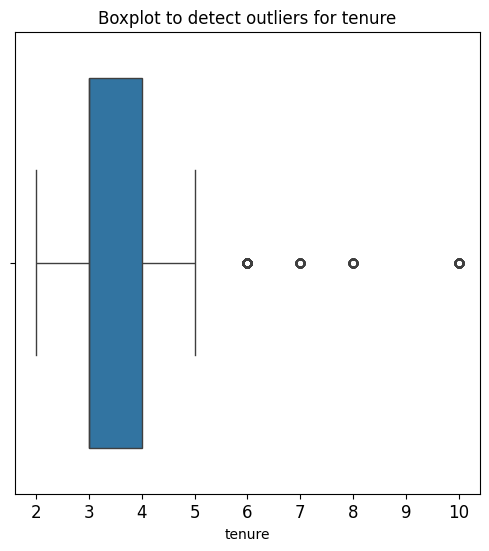

In [11]:
# Create a boxplot to visualize distribution of `tenure` and detect any outliers
plt.figure(figsize=(6,6))
plt.title('Boxplot to detect outliers for tenure', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
sns.boxplot(x=df1['tenure'])
plt.show()

* The boxplot above shows that there are outliers in the "tenure" field. 
* It would be beneficial to observe how many outliers there are in the tenure column

In [12]:
per_25 = df1['tenure'].quantile(0.25)
print(f"per_25: {per_25}")

per_75 = df1['tenure'].quantile(0.75)
print(f"per_75: {per_75}")

# Compute the interquartile range in `tenure`
iqr = per_75 - per_25
print(f"iqr: {iqr}")

# Define the upper limit and lower limit for non-outlier values in `tenure`
upper_limit = per_75 + 1.5 * iqr
lower_limit = per_25 - 1.5 * iqr
print("Lower limit:", lower_limit)
print("Upper limit:", upper_limit)

# Identify subset of data containing outliers in `tenure`
outliers = df1[(df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)]

# Count how many rows in the data contain outliers in `tenure`
print("Number of rows in the data containing outliers in `tenure`:", len(outliers))

per_25: 3.0
per_75: 4.0
iqr: 1.0
Lower limit: 1.5
Upper limit: 5.5
Number of rows in the data containing outliers in `tenure`: 824


Let's keep this info in mind in case we build a model to remove them.

In [13]:
df1['left'].value_counts()

left
0    10000
1     1991
Name: count, dtype: int64

In [14]:
df1['left'].value_counts(normalize=True)

left
0    0.833959
1    0.166041
Name: proportion, dtype: float64

### Data visualizations

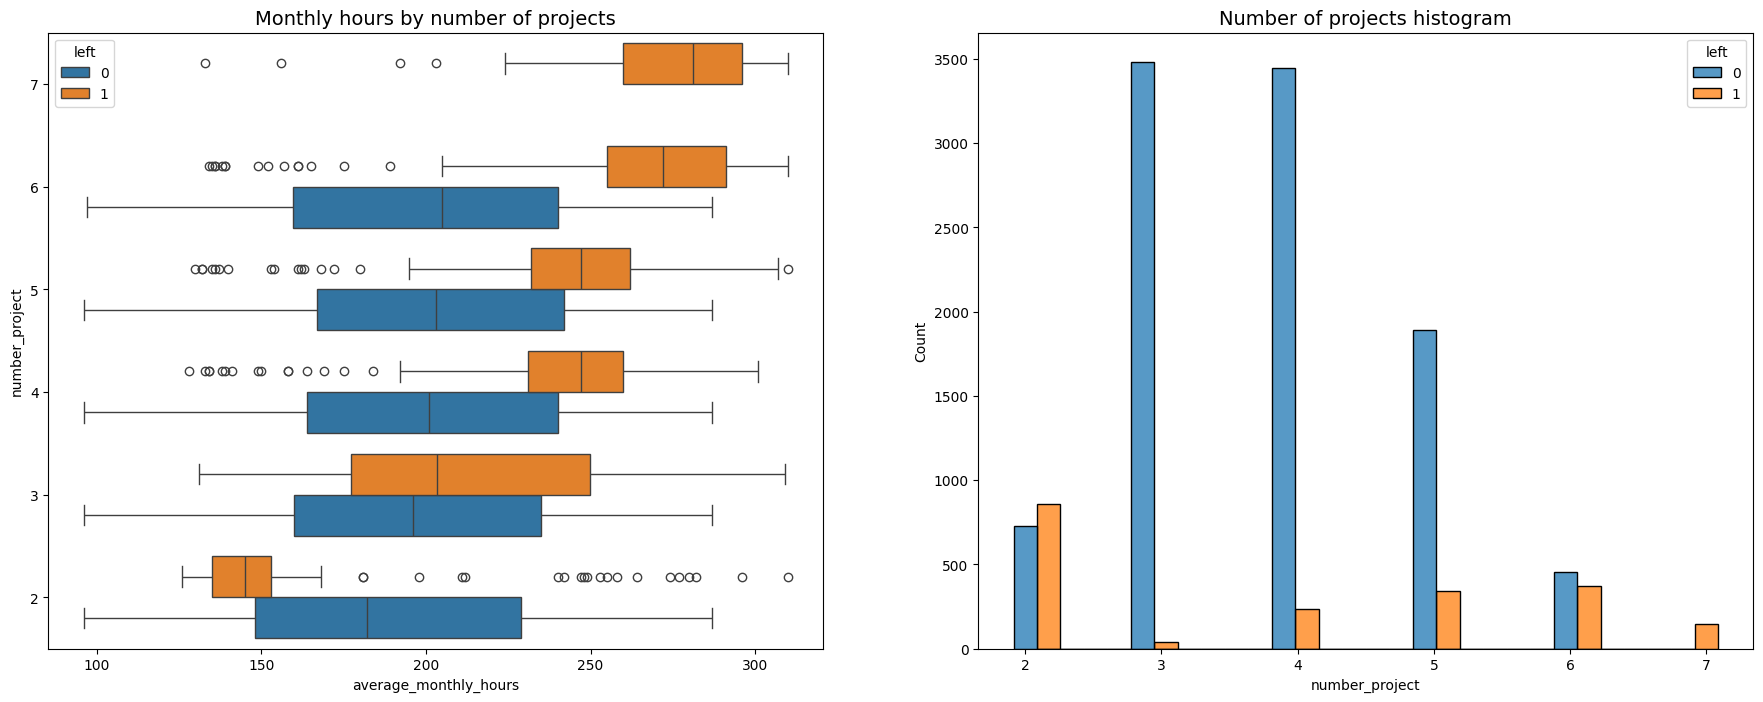

In [15]:
# Set figure and axes
fig, ax = plt.subplots(1, 2, figsize = (22,8))

# Create boxplot showing `average_monthly_hours` distributions for `number_project`, comparing employees who stayed versus those who left
sns.boxplot(data=df1, x='average_monthly_hours', y='number_project', hue='left', orient="h", ax=ax[0])
ax[0].invert_yaxis()
ax[0].set_title('Monthly hours by number of projects', fontsize='14')

# Create histogram showing distribution of `number_project`, comparing employees who stayed versus those who left
tenure_stay = df1[df1['left']==0]['number_project']
tenure_left = df1[df1['left']==1]['number_project']
sns.histplot(data=df1, x='number_project', hue='left', multiple='dodge', shrink=2, ax=ax[1])
ax[1].set_title('Number of projects histogram', fontsize='14')

# Display the plots
plt.show()

It might be natural that people who work on more projects would also work longer hours. This appears to be the case here, with the mean hours of each group (stayed and left) increasing with number of projects worked. However, a few things stand out from this plot.


1. There are two groups of employees who left the company: (A) those who worked considerably less than their peers with the same number of projects, and (B) those who worked much more. Of those in group A, it's possible that they were fired. It's also possible that this group includes employees who had already given their notice and were assigned fewer hours because they were already on their way out the door. For those in group B, it's reasonable to infer that they probably quit. The folks in group B likely contributed a lot to the projects they worked in; they might have been the largest contributors to their projects. 

2. Everyone with seven projects left the company, and the interquartile ranges of this group and those who left with six projects was ~255&ndash;295 hours/month&mdash;much more than any other group. 

3. The optimal number of projects for employees to work on seems to be 3&ndash;4. The ratio of left/stayed is very small for these cohorts.

4. If you assume a work week of 40 hours and two weeks of vacation per year, then the average number of working hours per month of employees working Monday&ndash;Friday `= 50 weeks * 40 hours per week / 12 months = 166.67 hours per month`. This means that, aside from the employees who worked on two projects, every group&mdash;even those who didn't leave the company&mdash;worked considerably more hours than this. It seems that employees here are overworked.

Tenure Distribution of Employees who works on two projects 

In [16]:
df_2project_emps = df1[df1.number_project == 2]
two_project_emps = df_2project_emps.groupby('tenure').agg({"tenure":'count'}).rename(columns={'tenure': 'employees_count'})
two_project_emps = two_project_emps.sort_values(by='employees_count', ascending=False)
two_project_emps

,employees_count
tenure,
3,1129
2,200
4,119
5,66
6,49
7,8
8,6
10,5


In [17]:
# Get value counts of stayed/left for employees with 7 projects
df1[df1['number_project']==7]['left'].value_counts()

left
1    145
Name: count, dtype: int64

This confirms that all employees with 7 projects did leave. 

In [18]:
projects = df1.groupby(['number_project']).agg({'number_project':'count','left':'sum'}).rename(columns={'number_project': 'employees_count'})
projects['percentage'] = round(projects['left'] / projects['employees_count'] * 100, 2)
projects = projects.sort_values(by='percentage', ascending=False)
projects

,employees_count,left,percentage
number_project,,,
7,145,145,100.00
2,1582,857,54.17
6,826,371,44.92
5,2233,343,15.36
4,3685,237,6.43
3,3520,38,1.08


This pivot table shows that half of the employees with 2 projects has left.

In [19]:
promotion = df1.groupby(['promotion_last_5years']).agg({'promotion_last_5years':'count','left':'sum'}).rename(columns={"promotion_last_5years": "# of Employees"})
promotion['percentage'] = round(promotion['left'] / promotion['# of Employees'] * 100, 2)
promotion = promotion.sort_values(by='percentage', ascending=False)
promotion

,# of Employees,left,percentage
promotion_last_5years,,,
0,11788,1983,16.82
1,203,8,3.94


The retention rate for promoted employees is significantly lower 3.94 % compared to unpromoted employees 16.82 %.

#### satisfaction_level VS average_monthly_hours

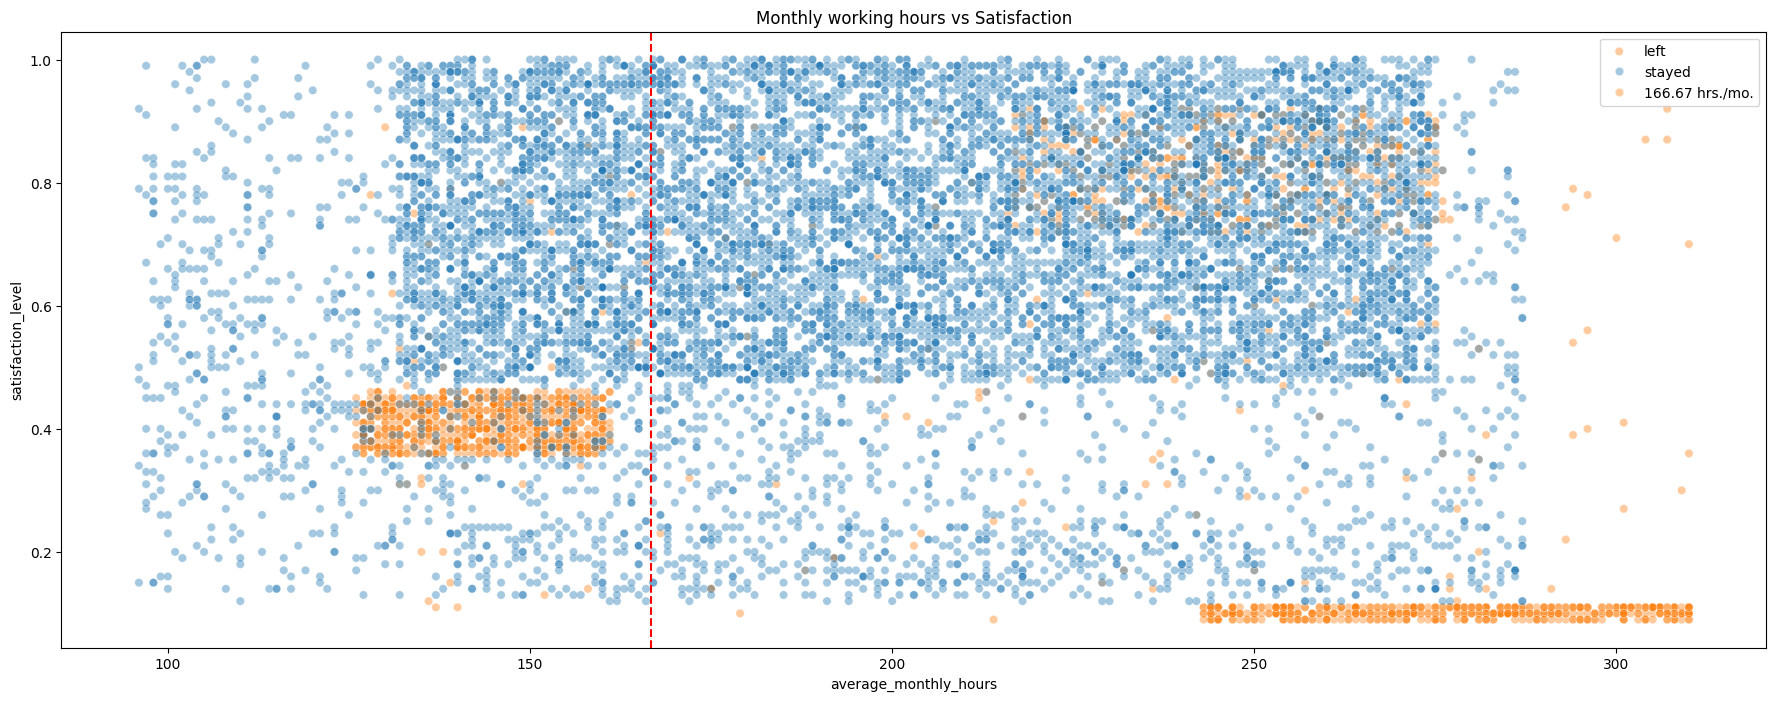

In [20]:

plt.figure(figsize=(22,8))
sns.scatterplot(x=df1['average_monthly_hours'], y=df1['satisfaction_level'], hue=df1['left'], alpha=0.4)
plt.axvline(x=166.67, color='red', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['left', 'stayed', '166.67 hrs./mo.'])
plt.title('Monthly working hours vs Satisfaction')
plt.show()

The scatterplot above shows that there was a sizeable group of employees who worked ~240–315 hours per month. 315 hours per month is over 75 hours per week for a whole year. It’s plausible that this intense workload is linked to their near-zero satisfaction levels.

The plot also shows another group of people who left, those who had more normal working hours. Even so, their satisfaction was only around 0.4. It's difficult to speculate about why they might have left. It's possible they felt pressured to work more, considering so many of their peers worked more. And that pressure could have lowered their satisfaction levels.

Finally, there is a also another group who worked ~210–280 hours per month, and their satisfaction levels are ranging ~0.7–0.9.

#### Satisfaction level VS tenure

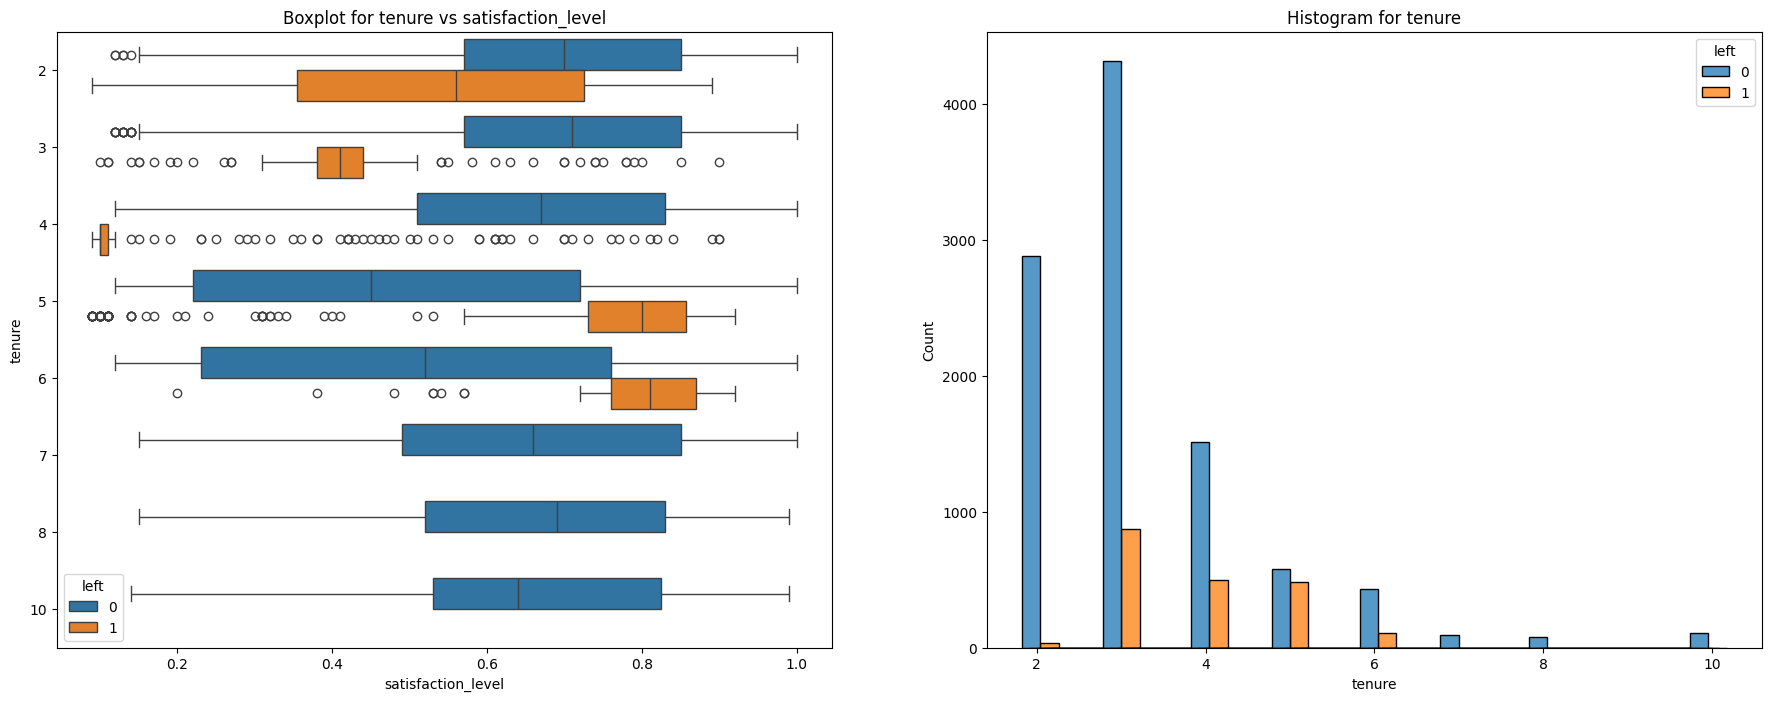

In [21]:

fig, ax = plt.subplots(1, 2, figsize = (22,8))
sns.boxplot(x=df1['satisfaction_level'], y=df1['tenure'], hue=df1['left'], orient='h', ax=ax[0])
ax[0].set_title('Boxplot for tenure vs satisfaction_level')

# Histogram showing distribution of tenure and compairing employees who left and stayed
tenure_stay = df1[df1['left']==0]['tenure']
tenure_left = df1[df1['left']==1]['tenure']
sns.histplot(data=df1, x='tenure', hue='left', multiple='dodge', shrink=5, ax=ax[1])
ax[1].set_title('Histogram for tenure')

plt.show()

In [22]:
df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])

/var/folders/v0/_xmnl28d6x941wn9nvckgknw0000gp/T/ipykernel_20103/3331776334.py:1: FutureWarning: The provided callable <function mean at 0x1032273a0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])
/var/folders/v0/_xmnl28d6x941wn9nvckgknw0000gp/T/ipykernel_20103/3331776334.py:1: FutureWarning: The provided callable <function median at 0x107826f70> is currently using SeriesGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  df1.groupby(['left'])['satisfaction_level'].agg([np.mean, np.median])


,mean,median
left,,
0,0.667365,0.69
1,0.440271,0.41


As expected, the mean and median satisfaction scores of employees who left are lower than those of employees who stayed. Among employees who stayed, the mean satisfaction score appears to be slightly below the median score. Among the employees who left, the mean satisfaction score appears to be slightly above the median score.



#### Salary Levels VS tenures

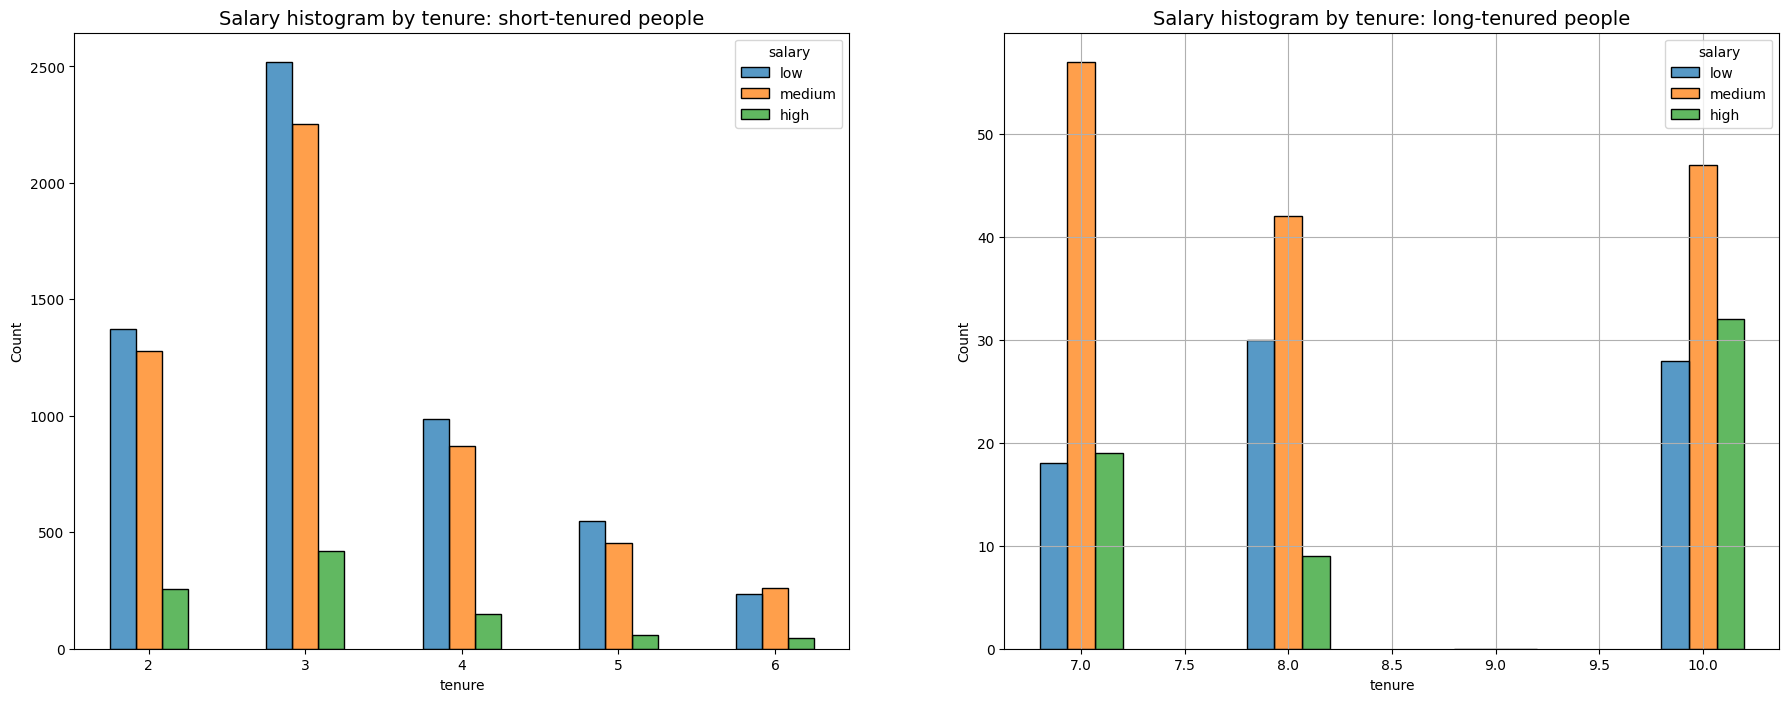

In [23]:

fig, ax = plt.subplots(1, 2, figsize=(22,8))
short_tenure = df1[df1['tenure'] < 7]
long_tenure = df1[df1['tenure'] > 6]

sns.histplot(data=short_tenure, x='tenure', hue='salary', multiple='dodge',
             hue_order=['low', 'medium', 'high'], shrink=.5, discrete=1, ax=ax[0])
ax[0].set_title('Salary histogram by tenure: short-tenured people', fontsize=14)
plt.grid(True)

sns.histplot(data=long_tenure, x='tenure', hue='salary', multiple='dodge',
             hue_order=['low', 'medium', 'high'], shrink=.4, discrete=1, ax=ax[1])
ax[1].set_title('Salary histogram by tenure: long-tenured people', fontsize=14)

plt.show()

The plots above show that long-tenured employees were not disproportionately comprised of higher-paid employees.



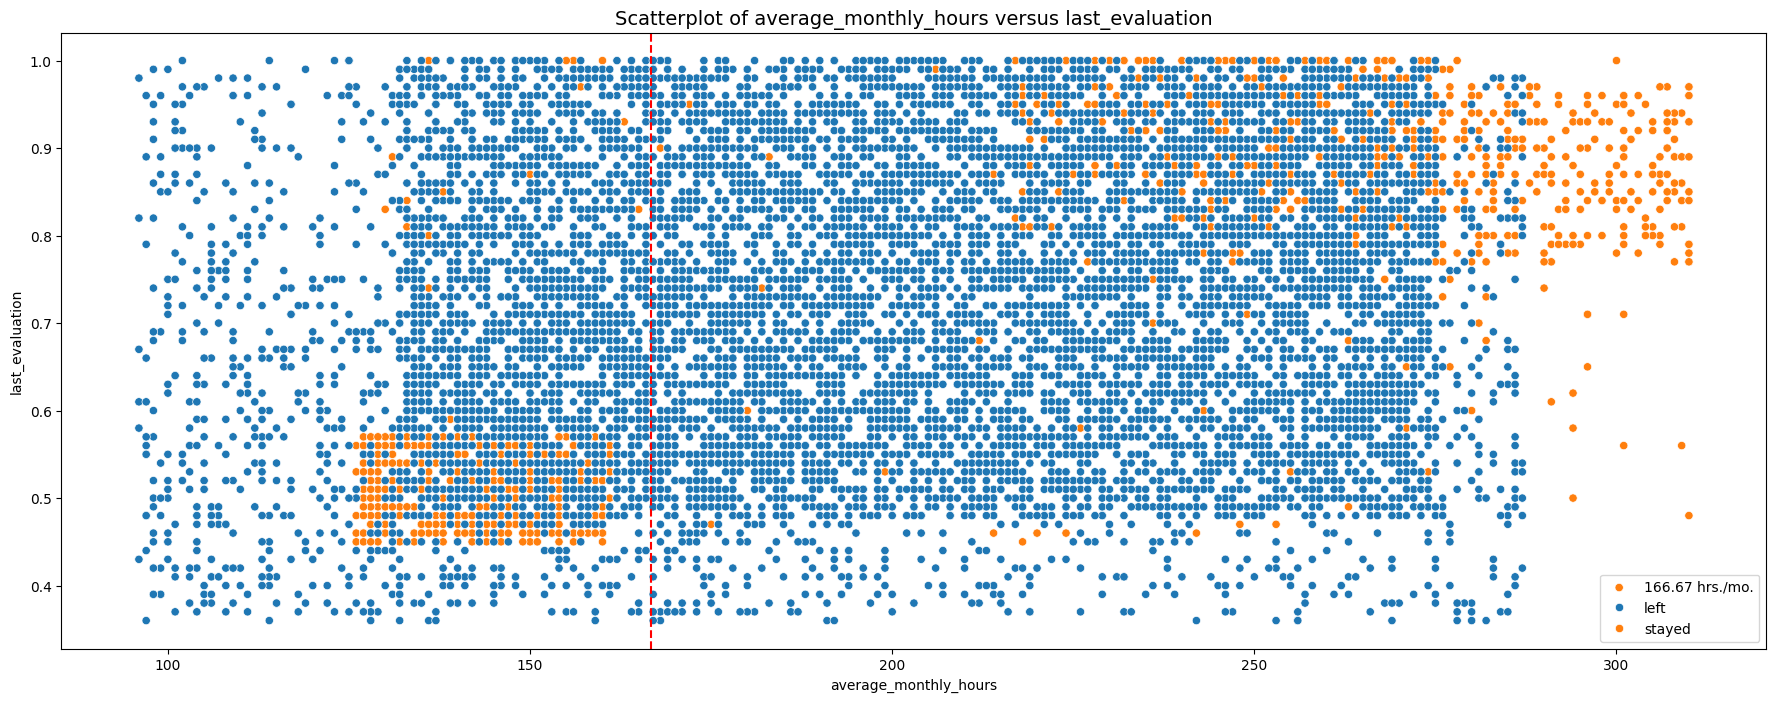

In [24]:
plt.figure(figsize=(22,8))
sns.scatterplot(data=df1, x='average_monthly_hours', y='last_evaluation', hue='left')
plt.axvline(x=166.67, color='red', label='166.67 hrs./mo.', ls='--')
plt.legend(labels=['166.67 hrs./mo.', 'left', 'stayed'])
plt.title('Scatterplot of average_monthly_hours versus last_evaluation', fontsize=14)

plt.show()

#### Salary Levels VS Number of Employees

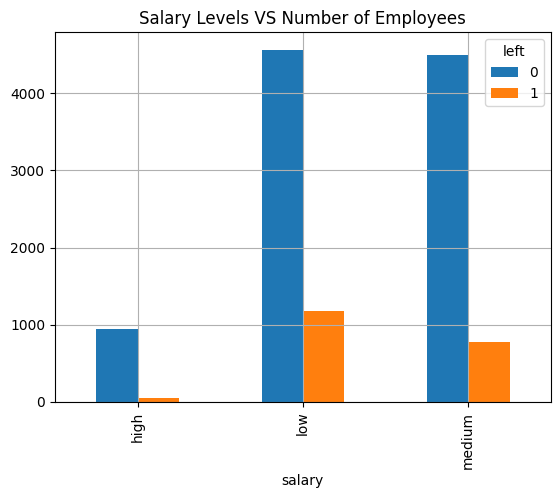

In [25]:
pd.crosstab(df1.salary, df1.left).plot(kind='bar')
plt.title('Salary Levels VS Number of Employees')
plt.grid(True)
plt.show()

A few amount of the employees with high salary left the company.

In [26]:
salary = df1.groupby(['salary']).agg({'salary':'count','left':'sum'}).rename(columns={"salary": "# of employees"})
salary['percentage'] = round(salary['left'] / salary['# of employees'] * 100, 2)
salary = salary.sort_values(by='percentage', ascending=False)
salary

,# of employees,left,percentage
salary,,,
low,5740,1174,20.45
medium,5261,769,14.62
high,990,48,4.85


#### Department VS Number of Employees

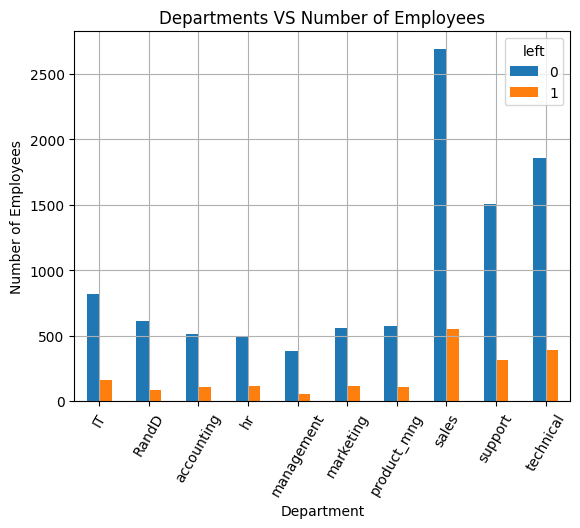

In [27]:
pd.crosstab(df1.department, df1.left).plot.bar(rot=60)
plt.title('Departments VS Number of Employees')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.grid(True)
plt.show()

In [28]:
departments = df1.groupby(['department']).agg({'department':'count','left':'sum'}).rename(columns={"department": "# of Employees"})
departments['percentage'] = round(departments['left'] / departments['# of Employees'] * 100, 2)
departments = departments.sort_values(by='percentage', ascending=False)
departments

,# of Employees,left,percentage
department,,,
hr,601,113,18.80
accounting,621,109,17.55
technical,2244,390,17.38
support,1821,312,17.13
sales,3239,550,16.98
marketing,673,112,16.64
IT,976,158,16.19
product_mng,686,110,16.03
RandD,694,85,12.25


#### Triangle Correlation Heatmap

Text(0.5, 1.0, 'Triangle Correlation Heatmap')

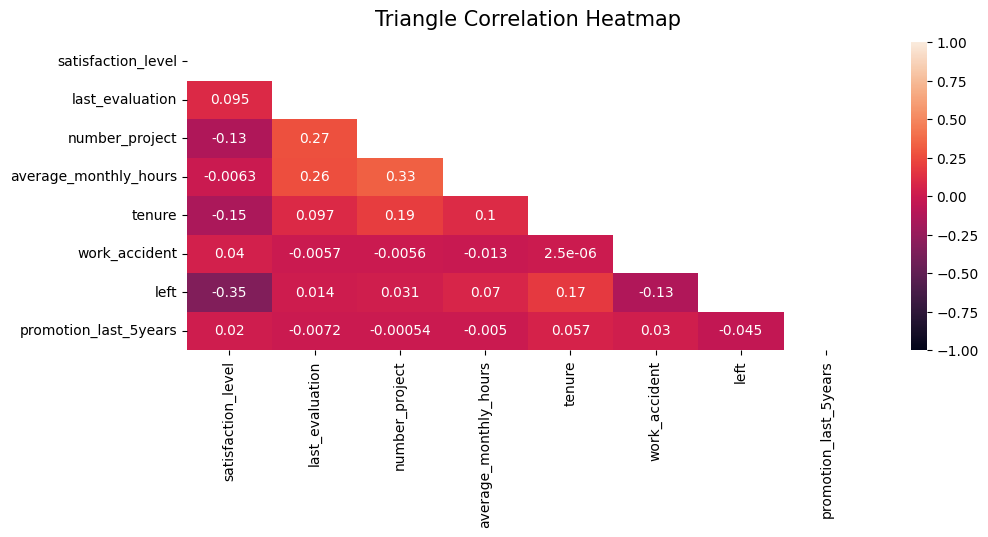

In [29]:
corr_df = df1.drop(columns=['department','salary']).corr()
plt.figure(figsize=(11, 4))
mask = np.triu(np.ones_like(corr_df, dtype='bool'))
heatmap = sns.heatmap(corr_df, mask=mask,vmin=-1, vmax=1, annot=True)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':15}, pad=12)

## Model Building

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score,\
f1_score, roc_curve, auc, confusion_matrix, ConfusionMatrixDisplay

### Logistic Regression Model

In [31]:
df_model = df1.copy()
df_model

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
11995,0.90,0.55,3,259,10,1,0,1,management,high
11996,0.74,0.95,5,266,10,0,0,1,management,high
11997,0.85,0.54,3,185,10,0,0,1,management,high
11998,0.33,0.65,3,172,10,0,0,1,marketing,high


In [32]:
ordinal_salary = {'low': 0, 'medium':1, 'high':2}
df_model['salary'] = df_model['salary'].map(ordinal_salary)
df_model = pd.get_dummies(df_model, ['department'])
df_model.head()

,satisfaction_level,last_evaluation,number_project,average_monthly_hours,tenure,work_accident,left,promotion_last_5years,salary,department_IT,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical
0,0.38,0.53,2,157,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False
1,0.80,0.86,5,262,6,0,1,0,1,False,False,False,False,False,False,False,True,False,False
2,0.11,0.88,7,272,4,0,1,0,1,False,False,False,False,False,False,False,True,False,False
3,0.72,0.87,5,223,5,0,1,0,0,False,False,False,False,False,False,False,True,False,False
4,0.37,0.52,2,159,3,0,1,0,0,False,False,False,False,False,False,False,True,False,False


In [33]:
# Without Outlier
per_25 = df1['tenure'].quantile(0.25)
per_75 = df1['tenure'].quantile(0.75)

iqr = per_75 - per_25

upper_limit = per_75 + 1.5 * iqr
lower_limit = per_25 - 1.5 * iqr

outliers = (df1['tenure'] > upper_limit) | (df1['tenure'] < lower_limit)

In [34]:
print(f"Length of original dataframe: {len(df_model)}")
      
print(f"Length of dataframe without outliers: {len(df_model[~outliers])}")


Length of original dataframe: 11991
Length of dataframe without outliers: 11167


In [35]:
df_model_wo_outliers = df_model[~outliers]
len(df_model_wo_outliers)

11167

In [36]:
y = df_model_wo_outliers.left
X = df_model_wo_outliers.drop(columns=['left'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify = y, random_state=42)

In [37]:
lr_model = LogisticRegression(random_state=42, max_iter=500).fit(X_train, y_train)
lr_model

LogisticRegression(max_iter=500, random_state=42)

In [38]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array([0, 1, 0, ..., 0, 0, 0])

Text(0.5, 0, 'Predicted')

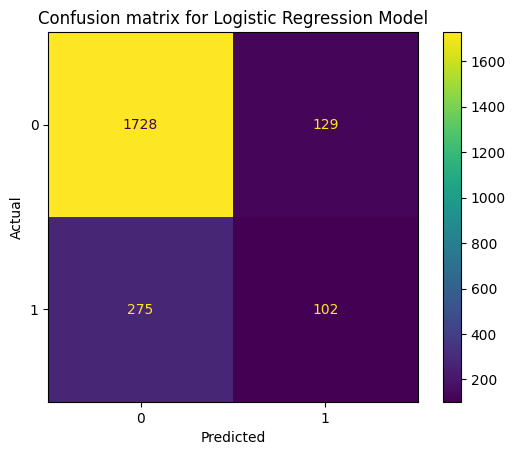

In [39]:
cm = confusion_matrix(y_test, y_pred_lr, labels=lr_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr_model.classes_)
  
disp.plot(values_format='') 
plt.title('Confusion matrix for Logistic Regression Model')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [40]:
target_names = ['Predicted as not leaving', 'Predicted as leaving']
print(classification_report(y_test, y_pred_lr, target_names=target_names))


                          precision    recall  f1-score   support

Predicted as not leaving       0.86      0.93      0.90      1857
    Predicted as leaving       0.44      0.27      0.34       377

                accuracy                           0.82      2234
               macro avg       0.65      0.60      0.62      2234
            weighted avg       0.79      0.82      0.80      2234



In [41]:
accuracy_lr =  accuracy_score(y_test, y_pred_lr)
precision_lr =  precision_score(y_test, y_pred_lr)
recall_lr = recall_score(y_test, y_pred_lr)
f1_lr =  f1_score(y_test, y_pred_lr)

fpr, tpr, thresholds = roc_curve(np.array(y_test), np.array(y_pred_lr))
auc_lr = auc(fpr, tpr)

In [42]:
df_lr = pd.DataFrame({'Model': ['Logistic Regression'], 'Accuracy': [accuracy_lr], 'Precision': [precision_lr], 'Recall': [recall_lr], 'F1': [f1_lr], 'AUC':[auc_lr]})
df_lr

,Model,Accuracy,Precision,Recall,F1,AUC
0,Logistic Regression,0.819158,0.441558,0.270557,0.335526,0.600545


### Random Forest Classifier


In [43]:
X = df_model.drop(columns='left')
y = df_model['left']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify = y, random_state=42)

In [44]:
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=0)

In [45]:
y_pred_rf = rf_model.predict(X_test)
y_pred_rf

array([0, 1, 0, ..., 0, 0, 1])

Text(0.5, 0, 'Predicted')

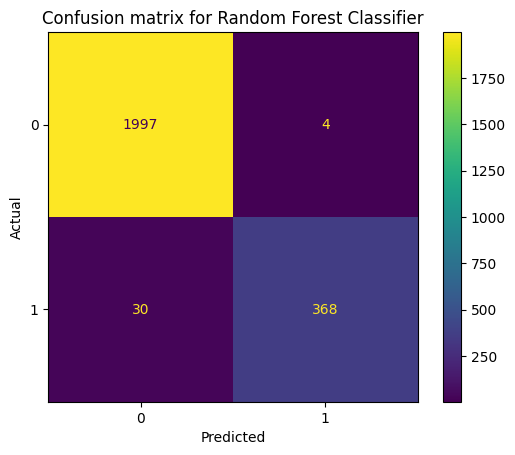

In [46]:
cm = confusion_matrix(y_test, y_pred_rf, labels=rf_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_model.classes_)
  
disp.plot(values_format='') 
plt.title('Confusion matrix for Random Forest Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [47]:
target_names = ['Predicted as not leaving', 'Predicted as leaving']
print(classification_report(y_test, y_pred_rf, target_names=target_names))

                          precision    recall  f1-score   support

Predicted as not leaving       0.99      1.00      0.99      2001
    Predicted as leaving       0.99      0.92      0.96       398

                accuracy                           0.99      2399
               macro avg       0.99      0.96      0.97      2399
            weighted avg       0.99      0.99      0.99      2399



In [48]:
accuracy_rf =  accuracy_score(y_test, y_pred_rf)
precision_rf =  precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf =  f1_score(y_test, y_pred_rf)

fpr, tpr, thresholds = roc_curve(np.array(y_test), np.array(y_pred_rf))
auc_rf = auc(fpr, tpr)

In [49]:
df_rf = pd.DataFrame({'Model': ['Random Forest Classifier'], 'Accuracy': [accuracy_rf], 'Precision': [precision_rf], 'Recall': [recall_rf], 'F1': [f1_rf], 'AUC':[auc_rf]})
df_rf

,Model,Accuracy,Precision,Recall,F1,AUC
0,Random Forest Classifier,0.985827,0.989247,0.924623,0.955844,0.961312


### Random Forest Classifier with Grid Search CV

In [50]:
rf_model = RandomForestClassifier(random_state=0)


cv_params = {'max_depth': [2,3,4,5, None], 
             'min_samples_leaf': [1,2,3],
             'min_samples_split': [2,3,4],
             'max_features': [2,4],
             'n_estimators': [100, 150]
             }  

scoring = ['accuracy', 'recall', 'f1']

rf_cv = GridSearchCV(rf_model, cv_params, scoring=scoring, cv=5, refit='f1')
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'max_features': [2, 4], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [100, 150]},
             refit='f1', scoring=['accuracy', 'recall', 'f1'])

In [51]:
rf_cv.best_estimator_

RandomForestClassifier(max_features=4, min_samples_split=4, random_state=0)

In [52]:
auc_test_rf_cv = np.mean(cross_val_score(rf_cv.best_estimator_, X_test, y_test, scoring='roc_auc', cv=5))
auc_train_rf_cv = np.mean(cross_val_score(rf_cv.best_estimator_, X_train, y_train, scoring='roc_auc', cv=5))

print('AUC on test set: ', auc_test_rf_cv)
print('AUC on training set: ', auc_train_rf_cv)

AUC on test set:  0.971726081059219
AUC on training set:  0.9794303676225692


In [53]:
y_pred_rf_cv = rf_cv.predict(X_test)
y_pred_rf_cv

array([0, 1, 0, ..., 0, 0, 1])

In [54]:
target_names = ['Predicted as not leaving', 'Predicted as leaving']
print(classification_report(y_test, y_pred_rf_cv, target_names=target_names))

                          precision    recall  f1-score   support

Predicted as not leaving       0.98      1.00      0.99      2001
    Predicted as leaving       0.99      0.92      0.95       398

                accuracy                           0.99      2399
               macro avg       0.99      0.96      0.97      2399
            weighted avg       0.99      0.99      0.99      2399



Text(0.5, 0, 'Predicted')

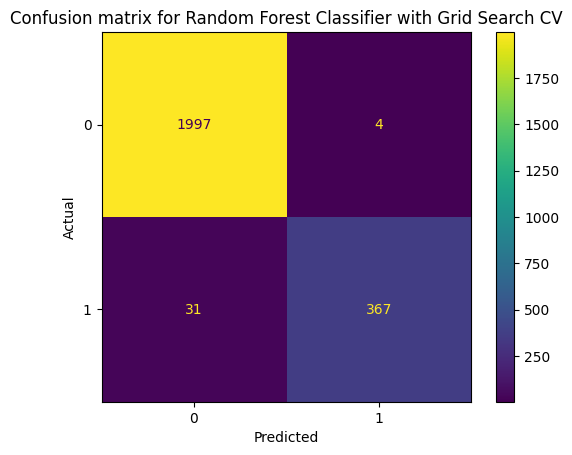

In [55]:
cm = confusion_matrix(y_test, y_pred_rf_cv, labels=rf_cv.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_cv.classes_)
  
disp.plot(values_format='') 
plt.title('Confusion matrix for Random Forest Classifier with Grid Search CV')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [56]:
accuracy_rf_cv =  accuracy_score(y_test, y_pred_rf_cv)
precision_rf_cv =  precision_score(y_test, y_pred_rf_cv)
recall_rf_cv = recall_score(y_test, y_pred_rf_cv)
f1_rf_cv =  f1_score(y_test, y_pred_rf_cv)

fpr, tpr, thresholds = roc_curve(np.array(y_test), np.array(y_pred_rf_cv))
auc_rf_cv = np.mean(cross_val_score(rf_cv.best_estimator_, X_test, y_test, scoring='roc_auc', cv=5))

In [57]:
df_rf_cv = pd.DataFrame({'Model': ['Random Forest Classifier with Grid Search CV'], 'Accuracy': [accuracy_rf_cv], 'Precision': [precision_rf_cv], 'Recall': [recall_rf_cv], 'F1': [f1_rf_cv], 'AUC':[auc_rf_cv]})
df_rf_cv

,Model,Accuracy,Precision,Recall,F1,AUC
0,Random Forest Classifier with Grid Search CV,0.985411,0.989218,0.922111,0.954486,0.971726


### XGB Classifier


In [58]:
xgb_model = XGBClassifier(objective='binary:logistic', random_state=0) 
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=0, ...)

In [59]:
y_pred_xgb = xgb_model.predict(X_test)
y_pred_xgb

array([0, 1, 0, ..., 0, 0, 1])

In [60]:
target_names = ['Predicted as not leaving', 'Predicted as leaving']
print(classification_report(y_test, y_pred_xgb, target_names=target_names))

                          precision    recall  f1-score   support

Predicted as not leaving       0.99      0.99      0.99      2001
    Predicted as leaving       0.96      0.93      0.95       398

                accuracy                           0.98      2399
               macro avg       0.97      0.96      0.97      2399
            weighted avg       0.98      0.98      0.98      2399



Text(0.5, 0, 'Predicted')

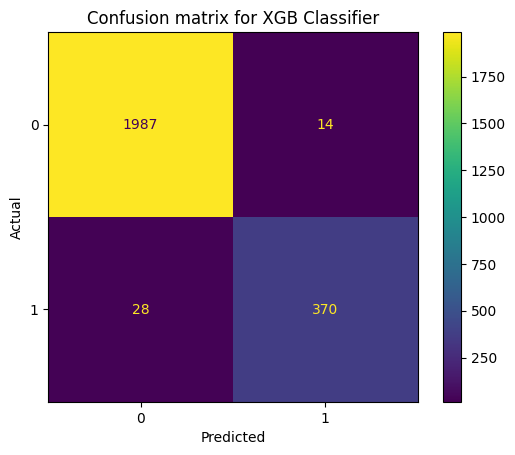

In [61]:
cm = confusion_matrix(y_test, y_pred_xgb, labels=xgb_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgb_model.classes_)
  
disp.plot(values_format='') 
plt.title('Confusion matrix for XGB Classifier')
plt.ylabel('Actual')
plt.xlabel('Predicted')

In [62]:
accuracy_xgb =  accuracy_score(y_test, y_pred_xgb)
precision_xgb =  precision_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb =  f1_score(y_test, y_pred_xgb)

fpr, tpr, thresholds = roc_curve(np.array(y_test), np.array(y_pred_xgb))
auc_xgb = auc(fpr, tpr)

In [63]:
df_xgb = pd.DataFrame({'Model': ['XGB Classifier'], 'Accuracy': [accuracy_xgb], 'Precision': [precision_xgb], 'Recall': [recall_xgb], 'F1': [f1_xgb], 'AUC':[auc_xgb]})
df_xgb

,Model,Accuracy,Precision,Recall,F1,AUC
0,XGB Classifier,0.982493,0.963542,0.929648,0.946292,0.961326


In [64]:
df_final = pd.concat([df_lr, df_rf, df_rf_cv, df_xgb]).reset_index()
df_final = df_final.drop('index', axis=1)
df_final

,Model,Accuracy,Precision,Recall,F1,AUC
0,Logistic Regression,0.819158,0.441558,0.270557,0.335526,0.600545
1,Random Forest Classifier,0.985827,0.989247,0.924623,0.955844,0.961312
2,Random Forest Classifier with Grid Search CV,0.985411,0.989218,0.922111,0.954486,0.971726
3,XGB Classifier,0.982493,0.963542,0.929648,0.946292,0.961326


### Conclusion

Here are some recommendations for stakeholders to retain employees:

- Limit the number of projects employees handle simultaneously.

- Integrate working hours into evaluation criteria.

- Implement fair promotion programs based on tenure and performance evaluations.

- Address issues of overwork by rewarding employees adequately and setting limits on excessive overtime.

- Clearly define workload expectations and time-off policies.

- Ensure employees are informed about the company's overtime pay policies.